In [ ]:
import pandas as pd
import numpy as np
from ultralytics import YOLO
import torch

import shutil
import os

import random

from PIL import Image
import cv2
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

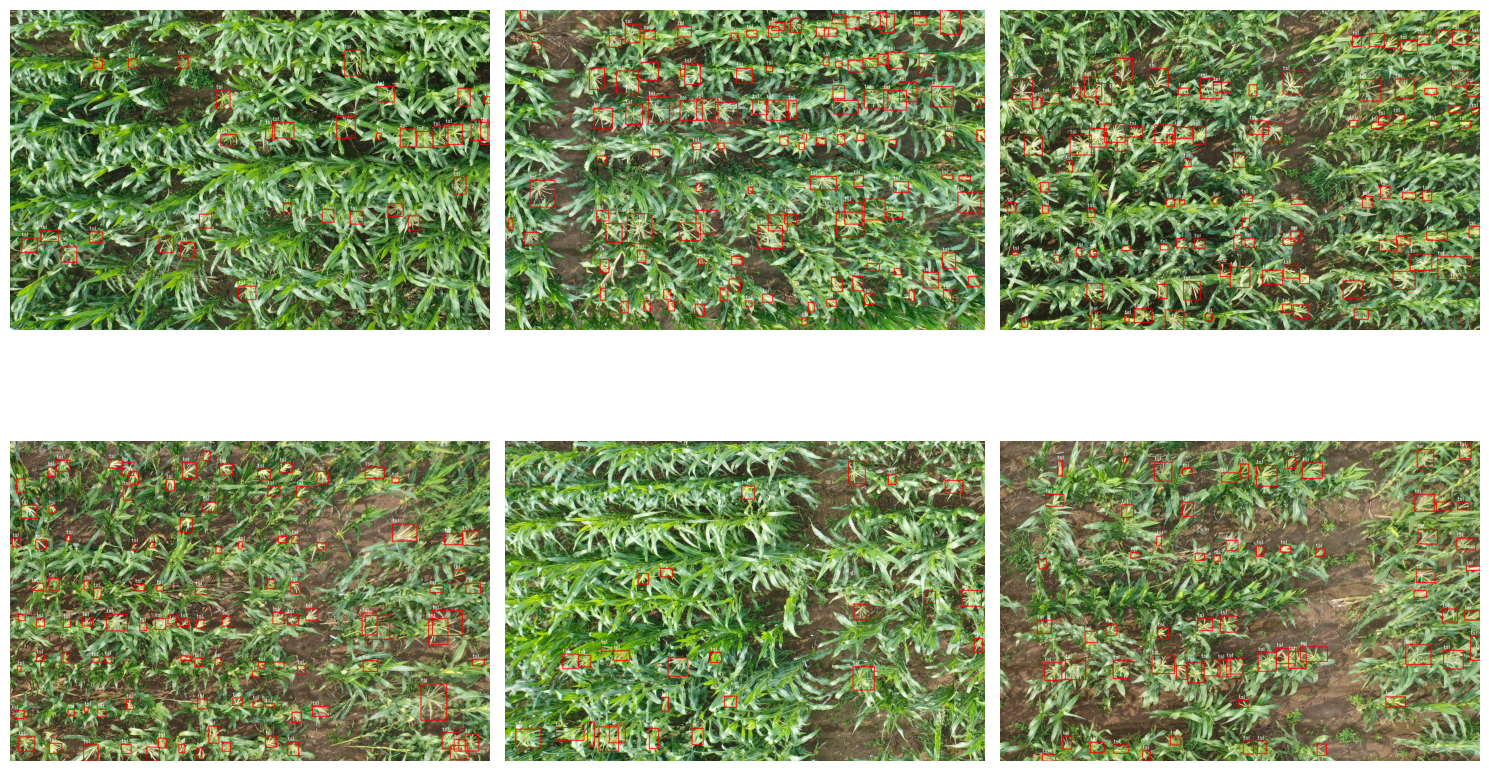

In [2]:
import yaml
random.seed(42)

# Папки с изображениями и метками
images_folder = "/home/user/CourseWork/datasets/Maize_Tassel_Small/train/images"
labels_folder = "/home/user/CourseWork/datasets/Maize_Tassel_Small/train/labels"

# Загрузка списка файлов изображений
image_files = os.listdir(images_folder)

# Выбор случайных изображений
random.shuffle(image_files)
random_image_files = image_files[:6]

# Отображение случайных изображений с метками
num_images = len(random_image_files)
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()


with open("data.yaml", "r") as f:
    data = yaml.safe_load(f)
classes = data["names"]  # Список классов

for i in range(num_images):
    # Загрузка изображения
    image_file = os.path.join(images_folder, random_image_files[i])
    image = cv2.imread(image_file)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Загрузка меток из файла
    label_file = os.path.join(labels_folder, os.path.splitext(random_image_files[i])[0] + ".txt")
    if not os.path.exists(label_file):
        continue
    with open(label_file, "r") as file:
        labels = file.readlines()

    # Отображение изображения с метками
    h, w, _ = image.shape
    for label in labels:
        class_id, x_center, y_center, box_width, box_height = map(float, label.strip().split())

        # Перевод YOLO координат в координаты прямоугольника
        x1 = int((x_center - box_width / 2) * w)
        y1 = int((y_center - box_height / 2) * h)
        x2 = int((x_center + box_width / 2) * w)
        y2 = int((y_center + box_height / 2) * h)

        # Настройка уменьшенной толщины и текста
        cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)  # Толщина = 1
        class_name = classes[int(class_id)] if int(class_id) < len(classes) else f"Class {int(class_id)}"

        font_scale = 0.6
        thickness = 2
        text_size = cv2.getTextSize(class_name, cv2.FONT_HERSHEY_SIMPLEX, font_scale, thickness)[0]
        text_x = x1
        text_y = y1 - 10 if y1 - 10 > 10 else y1 + 10

        # Фон под текстом (для четкости)
        cv2.rectangle(image, (x1, y1), (x2, y2), (255, 0, 0), 3)  # Увеличенная толщина
        font_scale = 1.0  # Увеличенный масштаб шрифта
        cv2.putText(image, class_name, (text_x, text_y), cv2.FONT_HERSHEY_SIMPLEX, font_scale, (255, 255, 255), thickness)

    # Отображение изображения
    axes[i].imshow(image)
    axes[i].axis("off")

plt.tight_layout()
plt.show()

In [3]:
model = YOLO("yolo11s.pt")

In [4]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [5]:
model.train(data='data.yaml ', epochs=80, imgsz=640,
            optimizer = 'AdamW', lr0 = 1e-3, 
            project = 'YOLO11s', name='7_easy_and_mixup',
            batch=32, device=device, seed=69,
            degrees=10,
            flipud=0.1,
            mixup=0.2)

New https://pypi.org/project/ultralytics/8.3.114 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.80 🚀 Python-3.10.12 torch-2.6.0+cu124 CUDA:0 (NVIDIA GeForce RTX 3090, 24252MiB)
engine/trainer: task=detect, mode=train, model=yolo11s.pt, data=data.yaml , epochs=80, time=None, patience=100, batch=32, imgsz=640, save=True, save_period=-1, cache=False, device=cuda, workers=8, project=YOLO11s, name=7_easy_and_mixup, exist_ok=False, pretrained=True, optimizer=AdamW, verbose=True, seed=69, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=Fal

train: Scanning /home/user/CourseWork/datasets/Maize_Tassel_Small/train/labels.cache... 485 images, 0 backgrounds, 0 corrupt: 100%|██████████| 485/485 [00:00<?, ?it/s]

albumentations: ImageCompression.__init__() got an unexpected keyword argument 'quality_range'



val: Scanning /home/user/CourseWork/datasets/Maize_Tassel_Small/valid/labels.cache... 124 images, 0 backgrounds, 0 corrupt: 100%|██████████| 124/124 [00:00<?, ?it/s]


Plotting labels to YOLO11s/7_easy_and_mixup/labels.jpg... 
optimizer: AdamW(lr=0.001, momentum=0.937) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to YOLO11s/7_easy_and_mixup
Starting training for 80 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/80      15.7G      4.118       2.98      2.041        409        640: 100%|██████████| 16/16 [00:05<00:00,  2.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.87it/s]

                   all        124       7610     0.0207        0.1     0.0159    0.00331


2025-04-23 17:17:31,151 - clearml - INFO - inf value encountered. Reporting it as '0.0'. Use clearml.Logger.set_reporting_inf_value to assign another value

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/80      17.5G      2.628      1.652      1.199        882        640: 100%|██████████| 16/16 [00:03<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.17it/s]

                   all        124       7610     0.0898      0.439      0.189     0.0556



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/80      14.2G      2.432      1.489      1.135        670        640: 100%|██████████| 16/16 [00:03<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.22it/s]

                   all        124       7610      0.325      0.358      0.282     0.0885



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/80      16.2G      2.334      1.402      1.103        799        640: 100%|██████████| 16/16 [00:03<00:00,  4.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.24it/s]

                   all        124       7610      0.485      0.568      0.523      0.193



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/80      14.6G      2.316      1.379      1.093        620        640: 100%|██████████| 16/16 [00:03<00:00,  4.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.33it/s]

                   all        124       7610      0.633      0.578       0.58      0.208



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/80      16.8G      2.288      1.352      1.084        515        640: 100%|██████████| 16/16 [00:03<00:00,  4.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.73it/s]

                   all        124       7610      0.635      0.526      0.526      0.186



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/80      12.5G      2.312      1.372      1.096        947        640: 100%|██████████| 16/16 [00:03<00:00,  4.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.82it/s]

                   all        124       7610      0.637      0.523      0.566       0.19



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/80      17.6G      2.244      1.304      1.065        540        640: 100%|██████████| 16/16 [00:03<00:00,  4.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.92it/s]

                   all        124       7610      0.682      0.583      0.588      0.198



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/80      15.2G      2.158      1.228      1.058        312        640: 100%|██████████| 16/16 [00:03<00:00,  4.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.82it/s]

                   all        124       7610      0.731      0.613      0.649      0.239



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/80      14.7G      2.191       1.26      1.067        945        640: 100%|██████████| 16/16 [00:03<00:00,  4.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.91it/s]

                   all        124       7610      0.724      0.624      0.652      0.248



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/80        16G      2.164      1.234      1.052        504        640: 100%|██████████| 16/16 [00:03<00:00,  4.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.91it/s]

                   all        124       7610      0.729      0.646      0.679      0.255



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/80      16.3G      2.181      1.245      1.061        349        640: 100%|██████████| 16/16 [00:03<00:00,  4.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.85it/s]

                   all        124       7610      0.741      0.654      0.687      0.268



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/80      13.3G       2.13      1.205      1.044        646        640: 100%|██████████| 16/16 [00:03<00:00,  4.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.82it/s]

                   all        124       7610      0.772      0.675      0.717      0.284



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/80      15.7G       2.14      1.192      1.045        510        640: 100%|██████████| 16/16 [00:03<00:00,  4.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.94it/s]

                   all        124       7610      0.748      0.673      0.708       0.28



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/80      12.5G       2.11      1.179      1.049        340        640: 100%|██████████| 16/16 [00:03<00:00,  4.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.97it/s]

                   all        124       7610      0.767      0.672      0.707      0.266



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/80      14.1G      2.104      1.147      1.037        864        640: 100%|██████████| 16/16 [00:03<00:00,  4.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.81it/s]

                   all        124       7610      0.756       0.67      0.701      0.272



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/80      16.4G      2.176      1.222      1.048        896        640: 100%|██████████| 16/16 [00:03<00:00,  4.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.88it/s]

                   all        124       7610      0.744      0.655        0.7      0.277



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/80      16.7G      2.092       1.15      1.045        700        640: 100%|██████████| 16/16 [00:03<00:00,  4.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.88it/s]

                   all        124       7610      0.757      0.645      0.692       0.27



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/80      16.4G      2.153      1.196       1.05        594        640: 100%|██████████| 16/16 [00:03<00:00,  4.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.82it/s]

                   all        124       7610       0.74      0.635       0.69      0.261



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/80      15.7G      2.078      1.165      1.039        720        640: 100%|██████████| 16/16 [00:03<00:00,  4.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.95it/s]

                   all        124       7610      0.742      0.684      0.693      0.263



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/80      15.1G      2.122      1.161      1.039        586        640: 100%|██████████| 16/16 [00:03<00:00,  4.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.48it/s]

                   all        124       7610      0.729      0.659      0.699      0.282



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/80      16.3G       2.07      1.145      1.036        858        640: 100%|██████████| 16/16 [00:03<00:00,  4.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.00it/s]

                   all        124       7610      0.786      0.691      0.745      0.302



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/80      14.4G      2.117      1.152      1.032        601        640: 100%|██████████| 16/16 [00:03<00:00,  4.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.01it/s]

                   all        124       7610      0.766      0.671      0.725      0.296



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/80      12.3G      2.062      1.139      1.035        427        640: 100%|██████████| 16/16 [00:03<00:00,  4.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.01it/s]

                   all        124       7610      0.792      0.688      0.752      0.319



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/80      14.8G      2.096       1.15      1.039        478        640: 100%|██████████| 16/16 [00:03<00:00,  4.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.99it/s]

                   all        124       7610      0.774      0.684      0.722       0.29



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/80      12.9G      2.051      1.122      1.038        711        640: 100%|██████████| 16/16 [00:03<00:00,  4.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.01it/s]

                   all        124       7610      0.764      0.684      0.701      0.252



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/80        14G      2.068      1.125      1.036        640        640: 100%|██████████| 16/16 [00:03<00:00,  4.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.81it/s]

                   all        124       7610      0.745      0.669      0.695      0.254



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/80      13.4G      2.067      1.151       1.04        608        640: 100%|██████████| 16/16 [00:03<00:00,  4.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.98it/s]

                   all        124       7610      0.754      0.662      0.701      0.271



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/80      17.2G      2.086      1.134       1.03        679        640: 100%|██████████| 16/16 [00:03<00:00,  4.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.81it/s]

                   all        124       7610       0.71      0.668      0.684       0.28



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/80      14.7G      2.051      1.133      1.029        460        640: 100%|██████████| 16/16 [00:03<00:00,  4.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.93it/s]

                   all        124       7610      0.735      0.668        0.7      0.288



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/80      15.7G      2.081      1.137      1.026        618        640: 100%|██████████| 16/16 [00:03<00:00,  4.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.04it/s]

                   all        124       7610       0.78      0.694      0.745      0.302



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/80      14.6G      2.048      1.115      1.031        632        640: 100%|██████████| 16/16 [00:03<00:00,  4.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.87it/s]

                   all        124       7610      0.784      0.684      0.745      0.314



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/80      12.7G      2.047      1.115      1.029        709        640: 100%|██████████| 16/16 [00:03<00:00,  4.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.94it/s]

                   all        124       7610      0.791      0.697      0.751      0.317



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/80      16.3G      2.061      1.131      1.022        526        640: 100%|██████████| 16/16 [00:03<00:00,  4.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.95it/s]

                   all        124       7610      0.779      0.688      0.753      0.327



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/80      14.9G      2.011      1.069      1.016        667        640: 100%|██████████| 16/16 [00:03<00:00,  4.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.96it/s]

                   all        124       7610      0.784      0.701      0.765      0.334



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/80      12.9G      2.033      1.099      1.023        520        640: 100%|██████████| 16/16 [00:03<00:00,  4.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.91it/s]

                   all        124       7610      0.792        0.7      0.766      0.334



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/80      14.7G      2.072      1.129      1.031       1187        640: 100%|██████████| 16/16 [00:03<00:00,  4.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.81it/s]

                   all        124       7610      0.791      0.686       0.76      0.332



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/80      14.8G      2.021      1.095      1.017        437        640: 100%|██████████| 16/16 [00:03<00:00,  4.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.92it/s]

                   all        124       7610      0.792      0.695      0.762      0.335



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/80      16.8G      2.009      1.071      1.015        671        640: 100%|██████████| 16/16 [00:03<00:00,  4.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.89it/s]

                   all        124       7610      0.765        0.7      0.751      0.323



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/80      13.2G      2.063      1.118      1.026        797        640: 100%|██████████| 16/16 [00:03<00:00,  4.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.87it/s]

                   all        124       7610      0.796      0.706      0.769      0.336



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/80      15.2G      2.006      1.074      1.009        405        640: 100%|██████████| 16/16 [00:03<00:00,  4.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.92it/s]

                   all        124       7610      0.723      0.673      0.695      0.291



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/80      13.4G      2.009      1.059      1.012        472        640: 100%|██████████| 16/16 [00:03<00:00,  4.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.95it/s]

                   all        124       7610      0.798      0.705      0.769      0.339



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/80      12.8G      1.994      1.074      1.016        463        640: 100%|██████████| 16/16 [00:03<00:00,  4.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.95it/s]

                   all        124       7610      0.795      0.702      0.768      0.334



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/80      16.4G      2.015      1.079      1.011        592        640: 100%|██████████| 16/16 [00:03<00:00,  4.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.99it/s]

                   all        124       7610      0.782      0.717      0.761       0.33



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/80        15G      2.022      1.078      1.015        745        640: 100%|██████████| 16/16 [00:03<00:00,  4.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.81it/s]

                   all        124       7610      0.779      0.714      0.764      0.335



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/80      14.3G      2.019      1.077      1.014        745        640: 100%|██████████| 16/16 [00:03<00:00,  4.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.99it/s]

                   all        124       7610      0.799      0.731      0.777      0.343



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/80      13.1G      1.987      1.061      1.015        663        640: 100%|██████████| 16/16 [00:03<00:00,  4.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.96it/s]

                   all        124       7610      0.803       0.73      0.788      0.359



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/80      15.4G      1.977      1.043      1.013        313        640: 100%|██████████| 16/16 [00:03<00:00,  4.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.87it/s]

                   all        124       7610      0.801      0.724      0.788      0.352



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/80      14.1G      2.015       1.07      1.019        701        640: 100%|██████████| 16/16 [00:03<00:00,  4.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.91it/s]

                   all        124       7610      0.786      0.715      0.772      0.346



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/80        12G      2.002      1.082      1.008        881        640: 100%|██████████| 16/16 [00:03<00:00,  4.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.93it/s]

                   all        124       7610      0.794      0.705      0.776      0.344



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      51/80      13.9G      2.036      1.081      1.016        895        640: 100%|██████████| 16/16 [00:03<00:00,  4.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.99it/s]

                   all        124       7610      0.809      0.709      0.778      0.345



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      52/80        15G      2.024      1.082       1.02        789        640: 100%|██████████| 16/16 [00:03<00:00,  4.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.95it/s]

                   all        124       7610      0.809      0.731      0.785      0.351



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      53/80      17.6G      2.007      1.072      1.007        604        640: 100%|██████████| 16/16 [00:03<00:00,  4.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.03it/s]

                   all        124       7610      0.774      0.711      0.757      0.334



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      54/80      15.2G      1.974      1.043      1.007        505        640: 100%|██████████| 16/16 [00:03<00:00,  4.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.91it/s]

                   all        124       7610      0.824      0.707      0.789      0.362



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      55/80      15.3G      1.985      1.056      1.015        773        640: 100%|██████████| 16/16 [00:03<00:00,  4.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.99it/s]

                   all        124       7610      0.799      0.708      0.776      0.349



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      56/80        15G      2.004      1.061      1.008        866        640: 100%|██████████| 16/16 [00:03<00:00,  4.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.99it/s]

                   all        124       7610      0.799      0.722      0.783      0.354



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      57/80      15.3G      1.984      1.058       1.01        592        640: 100%|██████████| 16/16 [00:03<00:00,  4.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.93it/s]

                   all        124       7610      0.766      0.706      0.755      0.336



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      58/80      12.8G      1.965      1.041      1.012        486        640: 100%|██████████| 16/16 [00:03<00:00,  4.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.97it/s]

                   all        124       7610      0.801      0.709      0.777      0.346



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      59/80      13.5G       1.97      1.031      1.012        394        640: 100%|██████████| 16/16 [00:03<00:00,  4.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.96it/s]

                   all        124       7610       0.79      0.718      0.775      0.347



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      60/80      18.3G      1.966      1.031      1.005        614        640: 100%|██████████| 16/16 [00:03<00:00,  4.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.96it/s]

                   all        124       7610      0.822      0.713      0.788       0.36



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      61/80      15.6G      1.976      1.047      1.003        594        640: 100%|██████████| 16/16 [00:03<00:00,  4.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.03it/s]

                   all        124       7610      0.792      0.711       0.77      0.342



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      62/80      12.7G      1.972      1.033      1.001        637        640: 100%|██████████| 16/16 [00:03<00:00,  4.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.99it/s]

                   all        124       7610      0.815      0.722      0.791      0.358



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      63/80      16.5G      1.964      1.035      1.011        476        640: 100%|██████████| 16/16 [00:03<00:00,  4.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.01it/s]

                   all        124       7610      0.821      0.737      0.801      0.367



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      64/80      17.1G      1.984      1.051      1.006        446        640: 100%|██████████| 16/16 [00:03<00:00,  4.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.72it/s]

                   all        124       7610      0.826      0.742      0.802       0.37



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      65/80        15G      1.956      1.038      1.002        569        640: 100%|██████████| 16/16 [00:03<00:00,  4.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.99it/s]

                   all        124       7610      0.813      0.726      0.794      0.362



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      66/80      14.6G      1.985      1.045       1.01        777        640: 100%|██████████| 16/16 [00:03<00:00,  4.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.98it/s]

                   all        124       7610      0.803      0.736       0.79      0.358



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      67/80      15.6G      1.914     0.9915     0.9972        495        640: 100%|██████████| 16/16 [00:03<00:00,  4.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.92it/s]

                   all        124       7610      0.811      0.714      0.791      0.359



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      68/80      11.4G      1.973      1.033      1.002        912        640: 100%|██████████| 16/16 [00:03<00:00,  4.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.97it/s]

                   all        124       7610      0.819      0.727      0.797      0.362



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      69/80      14.8G       1.95      1.008      1.003        691        640: 100%|██████████| 16/16 [00:03<00:00,  4.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.83it/s]

                   all        124       7610      0.817      0.728      0.796      0.362



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      70/80      13.5G      1.948      1.026      1.001        263        640: 100%|██████████| 16/16 [00:03<00:00,  4.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.02it/s]

                   all        124       7610      0.804      0.737      0.791      0.359


Closing dataloader mosaic
albumentations: ImageCompression.__init__() got an unexpected keyword argument 'quality_range'

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      71/80      11.4G      1.838      1.046      1.004        310        640: 100%|██████████| 16/16 [00:05<00:00,  2.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.88it/s]

                   all        124       7610      0.804      0.722      0.784      0.358



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      72/80      9.21G      1.816     0.9323     0.9956        266        640: 100%|██████████| 16/16 [00:03<00:00,  4.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.03it/s]

                   all        124       7610      0.827       0.72      0.796      0.366



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      73/80      10.3G      1.805     0.9229     0.9984        167        640: 100%|██████████| 16/16 [00:03<00:00,  4.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.90it/s]

                   all        124       7610       0.82      0.735      0.792      0.354



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      74/80      9.41G      1.775     0.8945     0.9968        267        640: 100%|██████████| 16/16 [00:03<00:00,  4.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.95it/s]

                   all        124       7610      0.822      0.735      0.799      0.363



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      75/80       8.8G      1.792     0.9014     0.9808        254        640: 100%|██████████| 16/16 [00:03<00:00,  4.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.87it/s]

                   all        124       7610      0.818      0.734      0.794      0.357



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      76/80      9.88G      1.797      0.903     0.9875        339        640: 100%|██████████| 16/16 [00:03<00:00,  4.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.91it/s]

                   all        124       7610      0.818      0.739      0.795      0.355



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      77/80      8.98G      1.778      0.903     0.9924        158        640: 100%|██████████| 16/16 [00:03<00:00,  4.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.92it/s]

                   all        124       7610      0.818      0.736        0.8      0.365



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      78/80      10.5G      1.783     0.8846     0.9894        375        640: 100%|██████████| 16/16 [00:03<00:00,  4.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.88it/s]

                   all        124       7610      0.822      0.739      0.801      0.365



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      79/80      9.48G      1.776     0.8839     0.9888        363        640: 100%|██████████| 16/16 [00:03<00:00,  4.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.95it/s]

                   all        124       7610      0.821      0.741      0.802      0.365



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      80/80      8.81G      1.765     0.8753     0.9852        253        640: 100%|██████████| 16/16 [00:03<00:00,  4.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.87it/s]

                   all        124       7610      0.824      0.737      0.801      0.366



80 epochs completed in 0.125 hours.
Optimizer stripped from YOLO11s/7_easy_and_mixup/weights/last.pt, 19.2MB
Optimizer stripped from YOLO11s/7_easy_and_mixup/weights/best.pt, 19.2MB

Validating YOLO11s/7_easy_and_mixup/weights/best.pt...
Ultralytics 8.3.80 🚀 Python-3.10.12 torch-2.6.0+cu124 CUDA:0 (NVIDIA GeForce RTX 3090, 24252MiB)
YOLO11s summary (fused): 100 layers, 9,413,187 parameters, 0 gradients, 21.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.96s/it]


                   all        124       7610      0.827      0.742      0.802       0.37
Speed: 0.1ms preprocess, 1.0ms inference, 0.0ms loss, 0.9ms postprocess per image
Results saved to YOLO11s/7_easy_and_mixup


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7fe24e8a2b60>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

2025-04-23 17:25:10,765 - clearml.storage - INFO - Uploading: 18.27MB to YOLO11s/7_easy_and_mixup/weights/best.pt


███████████████████████████████ 100% | 18.27/18.27 MB [00:01<00:00, 17.21MB/s]: /home/user/.local/lib/python3.10/site-packages/tqdm/std.py:636: TqdmWarning: clamping frac to range [0, 1]
  full_bar = Bar(frac,
███████████████████████████████ 100% | 18.27/18.27 MB [00:01<00:00, 12.13MB/s]: 

2025-04-23 17:25:12,283 - clearml.Task - INFO - Completed model upload to https://files.clear.ml/YOLO11s/7_easy_and_mixup.707c7f63c0034104bc9dbf449febc450/models/best.pt


In [11]:
df = pd.read_csv('YOLO11s/7_easy_and_mixup/results.csv')

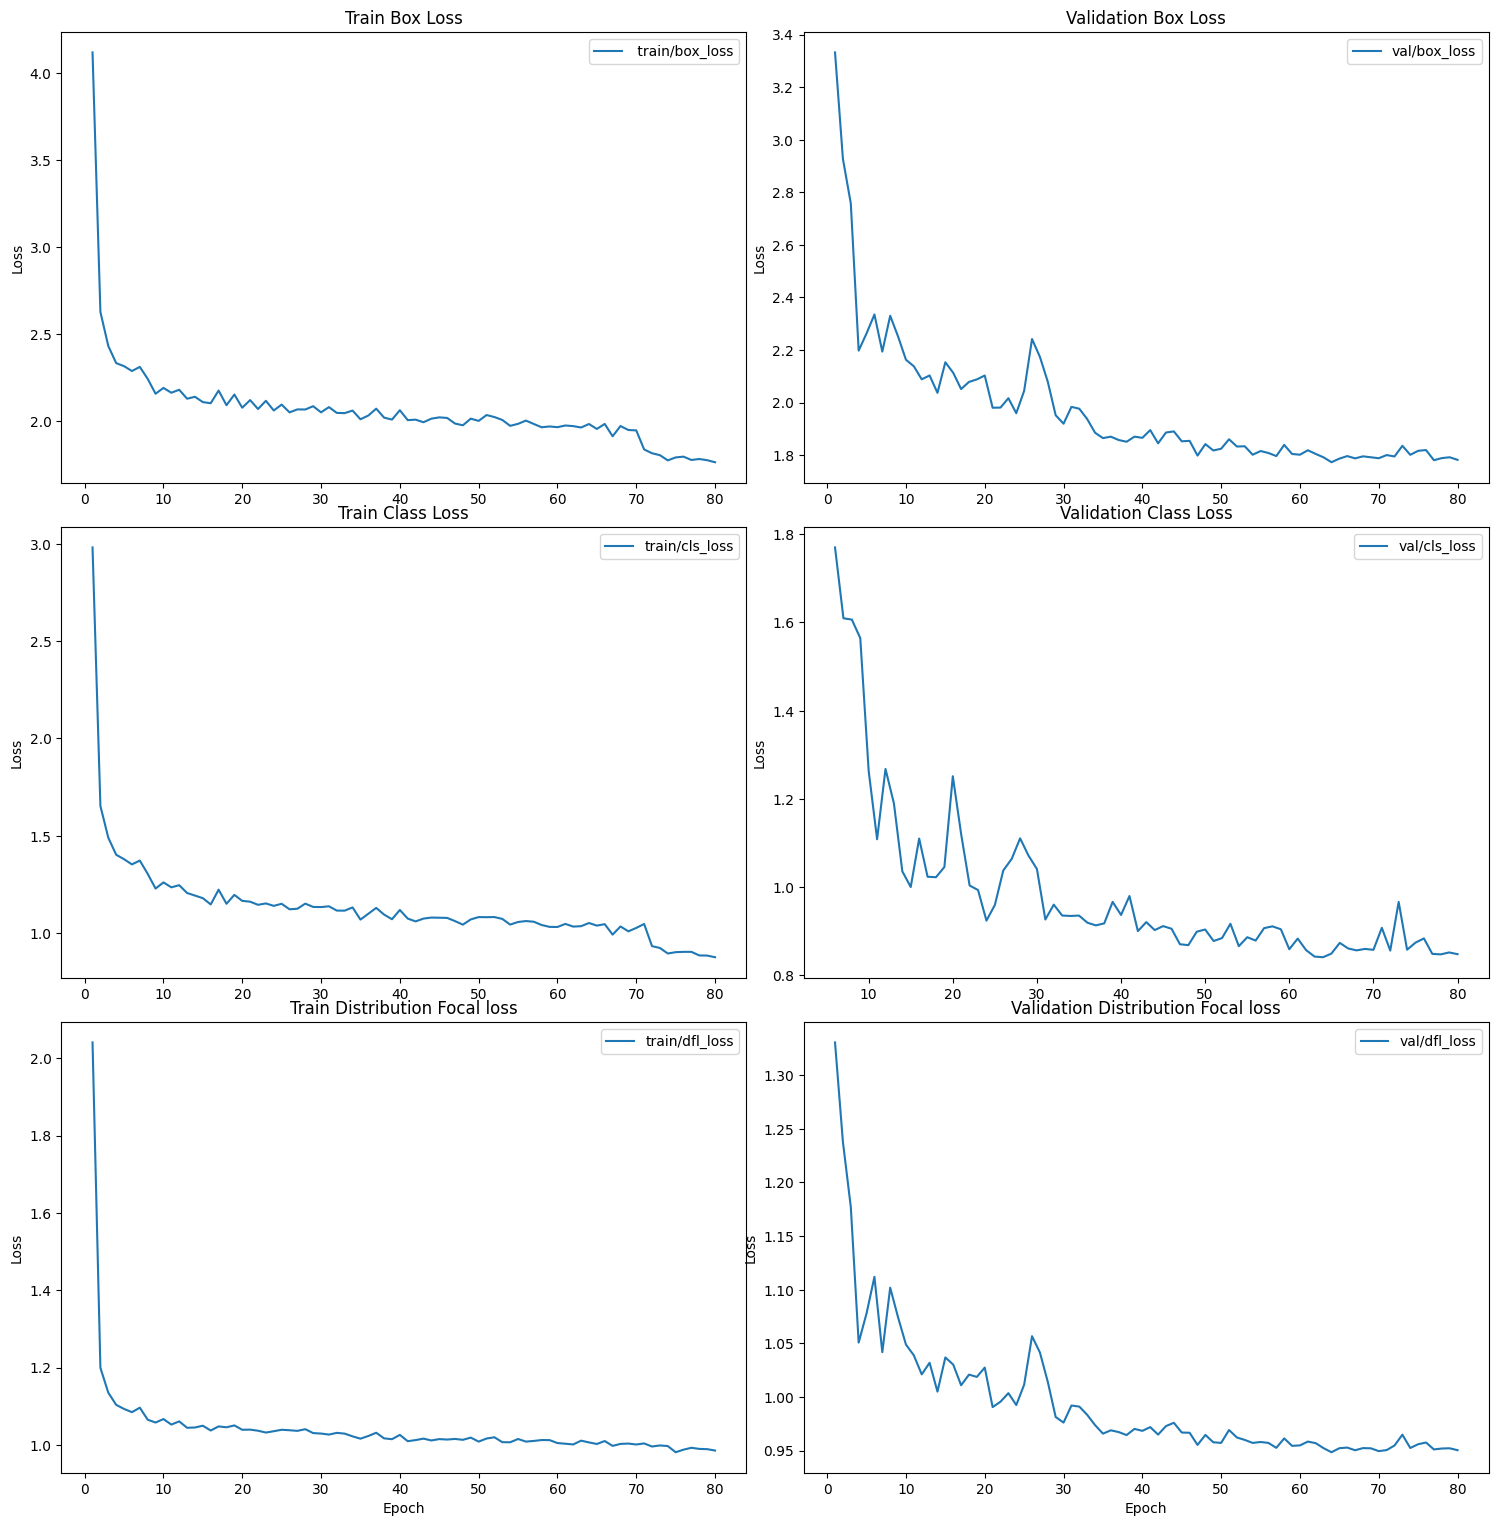

In [12]:
fig, axes = plt.subplots(3, 2, figsize=(15, 15))
fig.tight_layout()

# train/box_loss
axes[0, 0].plot(df['epoch'], df['train/box_loss'], label=' train/box_loss')
axes[0, 0].set_title('Train Box Loss')
axes[0, 0].set_ylabel('Loss')
axes[0, 0].legend()

# val/box_loss
axes[0, 1].plot(df['epoch'], df['val/box_loss'], label='val/box_loss')
axes[0, 1].set_title('Validation Box Loss')
axes[0, 1].set_ylabel('Loss')
axes[0, 1].legend()

# train/cls_loss
axes[1, 0].plot(df['epoch'], df['train/cls_loss'], label='train/cls_loss')
axes[1, 0].set_title('Train Class Loss')
axes[1, 0].set_ylabel('Loss')
axes[1, 0].legend()

# val/cls_loss
axes[1, 1].plot(df['epoch'], df['val/cls_loss'], label='val/cls_loss')
axes[1, 1].set_title('Validation Class Loss')
axes[1, 1].set_ylabel('Loss')
axes[1, 1].legend()

# train/dfl_loss
axes[2, 0].plot(df['epoch'], df['train/dfl_loss'], label='train/dfl_loss')
axes[2, 0].set_title('Train Distribution Focal loss')
axes[2, 0].set_xlabel('Epoch')
axes[2, 0].set_ylabel('Loss')
axes[2, 0].legend()

# val/dfl_loss
axes[2, 1].plot(df['epoch'], df['val/dfl_loss'], label='val/dfl_loss')
axes[2, 1].set_title('Validation Distribution Focal loss')
axes[2, 1].set_xlabel('Epoch')
axes[2, 1].set_ylabel('Loss')
axes[2, 1].legend()

plt.show()

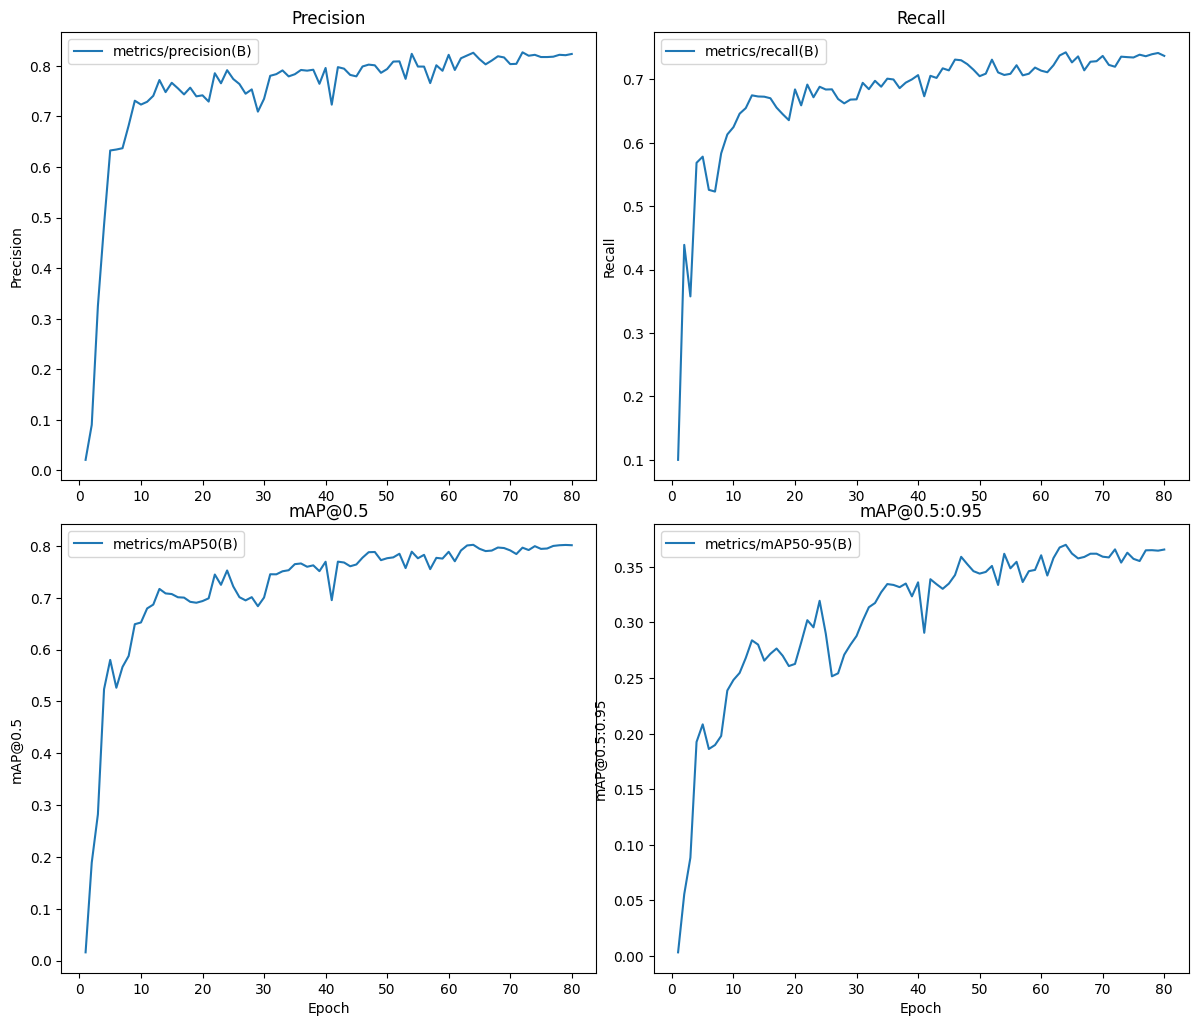

In [8]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.tight_layout()

# metrics/precision(B)
axes[0, 0].plot(df['epoch'], df['metrics/precision(B)'], label='metrics/precision(B)')
axes[0, 0].set_title('Precision')
axes[0, 0].set_ylabel('Precision')
axes[0, 0].legend()

# metrics/recall(B)
axes[0, 1].plot(df['epoch'], df['metrics/recall(B)'], label='metrics/recall(B)')
axes[0, 1].set_title('Recall')
axes[0, 1].set_ylabel('Recall')
axes[0, 1].legend()

# График для metrics/mAP50(B)
axes[1, 0].plot(df['epoch'], df['metrics/mAP50(B)'], label='metrics/mAP50(B)')
axes[1, 0].set_title('mAP@0.5')
axes[1, 0].set_ylabel('mAP@0.5')
axes[1, 0].set_xlabel('Epoch')
axes[1, 0].legend()

# metrics/mAP50-95(B)
axes[1, 1].plot(df['epoch'], df['metrics/mAP50-95(B)'], label='metrics/mAP50-95(B)')
axes[1, 1].set_title('mAP@0.5:0.95')
axes[1, 1].set_ylabel('mAP@0.5:0.95')
axes[1, 1].set_xlabel('Epoch')
axes[1, 1].legend()

plt.show()

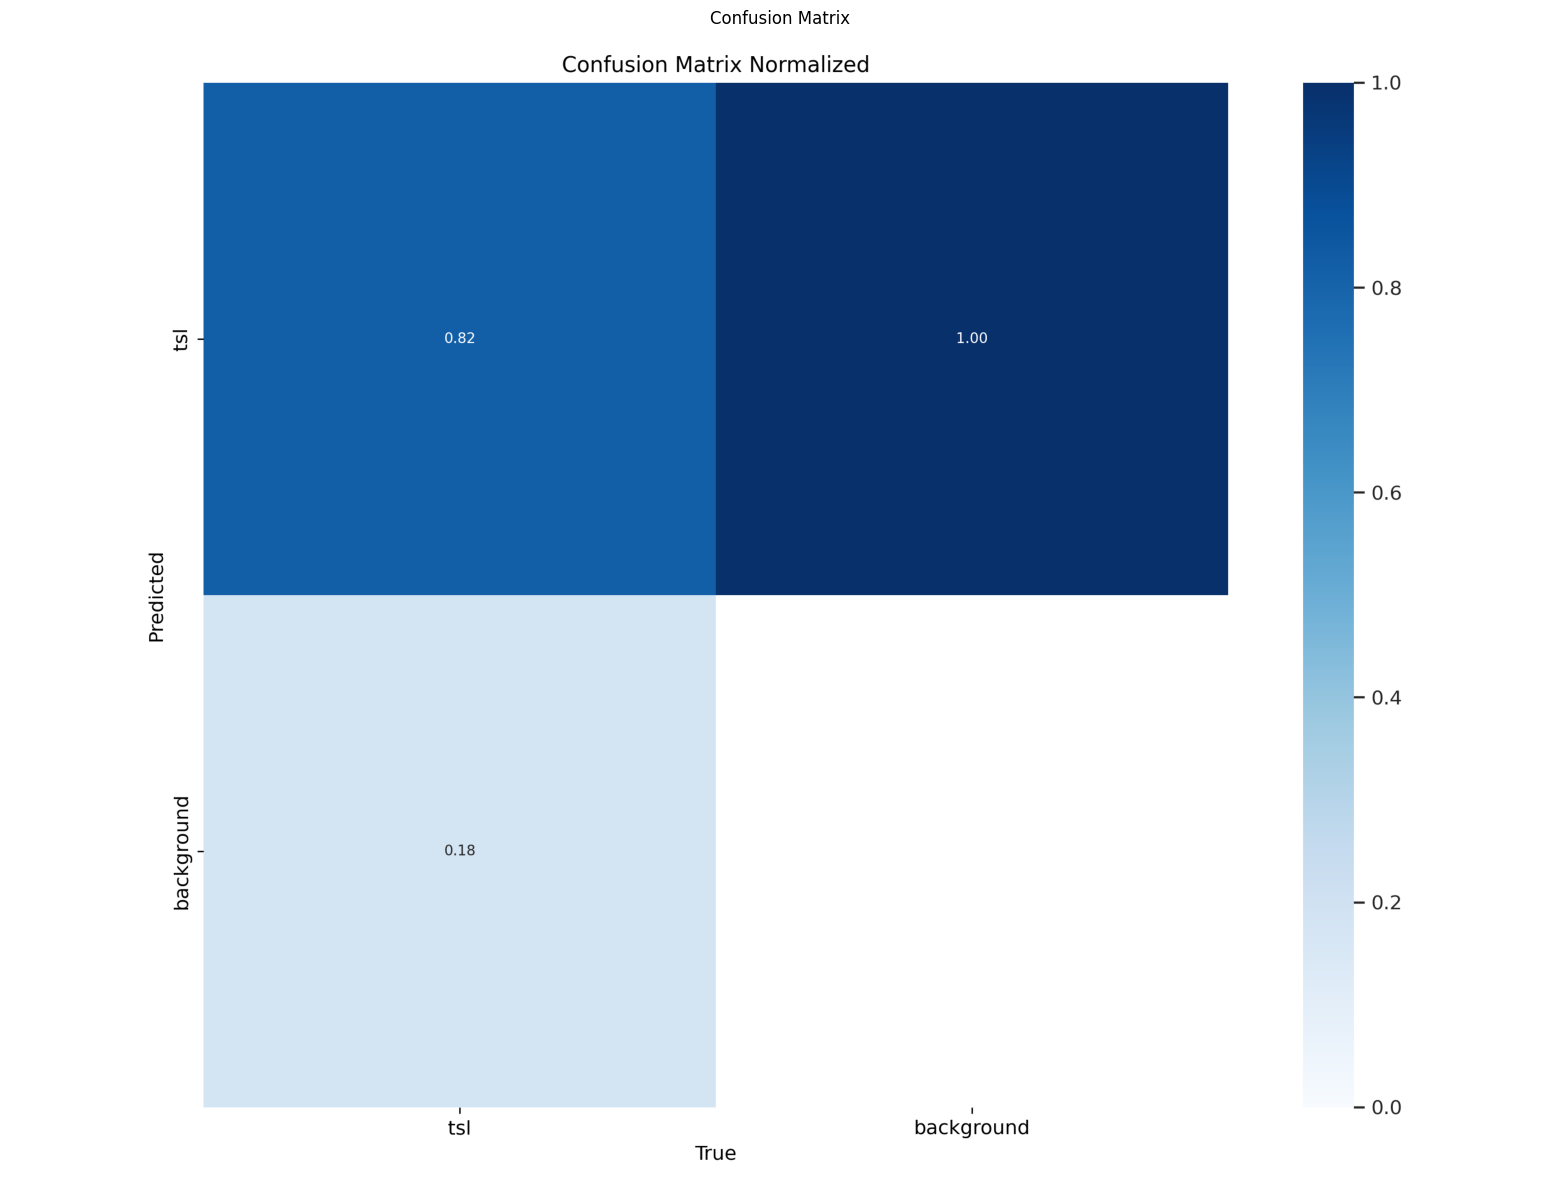

In [13]:
confusion_matrix = Image.open("YOLO11s/7_easy_and_mixup/confusion_matrix_normalized.png")
plt.figure(figsize=(20, 15))
plt.imshow(confusion_matrix)
plt.title("Confusion Matrix")
plt.axis("off")
plt.show()


image 1/1 /home/user/CourseWork/datasets/Maize_Tassel_Small/test/images/DJI_0103-2-_1_0_jpg.rf.b647a7f2d546429c7f2e8d7e824c8fc9.jpg: 448x640 44 tsls, 14.3ms
Speed: 20.4ms preprocess, 14.3ms inference, 1.7ms postprocess per image at shape (1, 3, 448, 640)


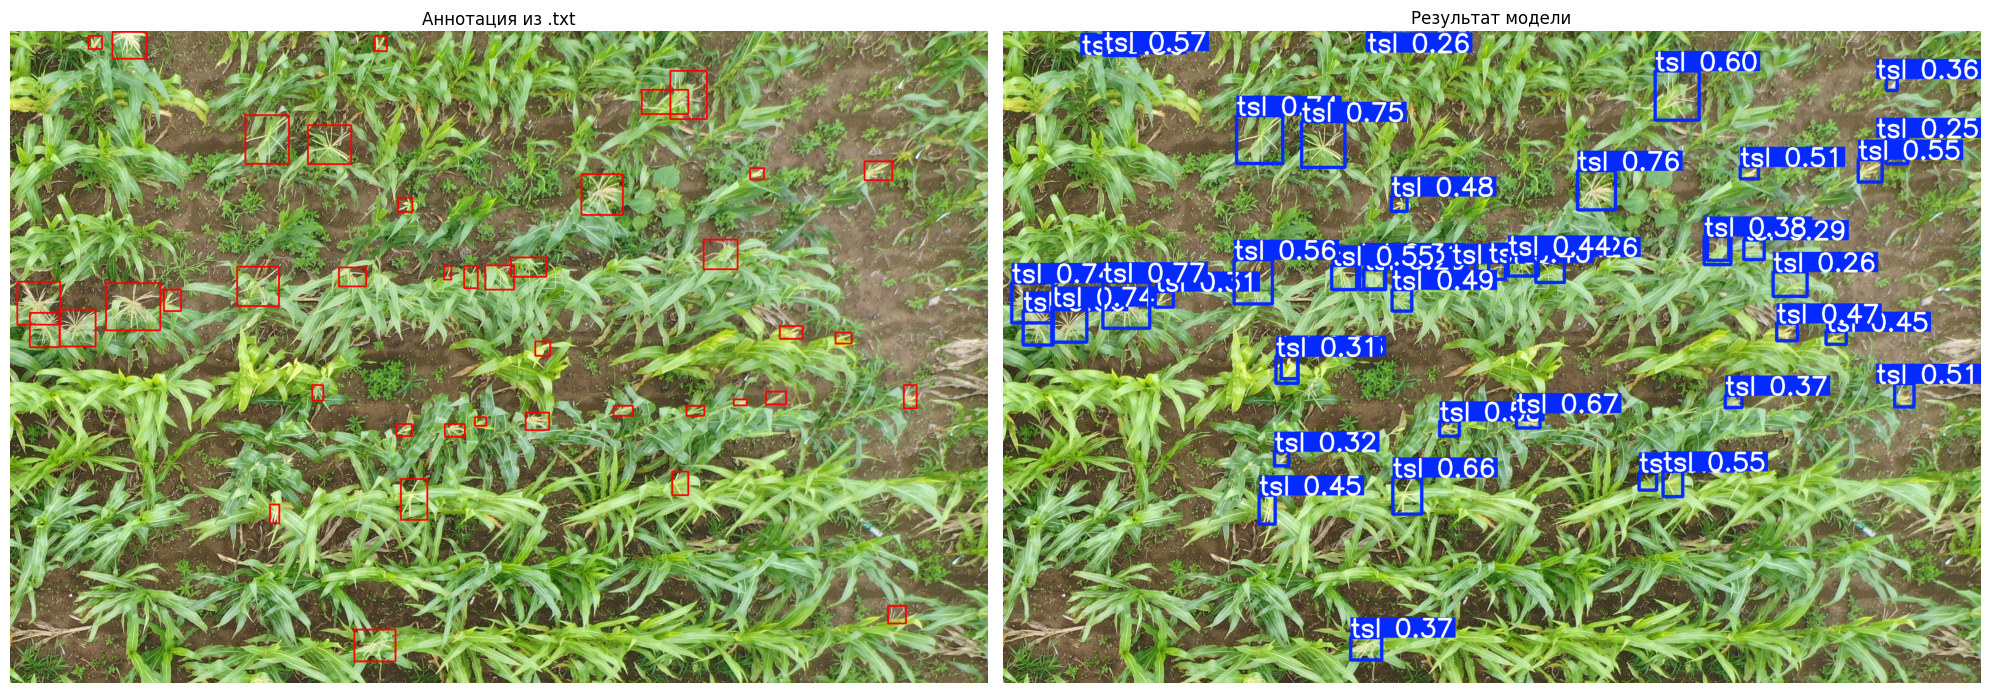

In [14]:
import cv2
import matplotlib.pyplot as plt
import os

image_path = '/home/user/CourseWork/datasets/Maize_Tassel_Small/test/images/DJI_0103-2-_1_0_jpg.rf.b647a7f2d546429c7f2e8d7e824c8fc9.jpg'
label_path = image_path.replace('/images/', '/labels/').replace('.jpg', '.txt')

# Загружаем оригинальное изображение
orig_img = cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB)
height, width = orig_img.shape[:2]

# Загружаем аннотации
with open(label_path, 'r') as f:
    boxes = f.readlines()

# Рисуем боксы
for box in boxes:
    cls, x_center, y_center, w, h = map(float, box.strip().split())
    x1 = int((x_center - w / 2) * width)
    y1 = int((y_center - h / 2) * height)
    x2 = int((x_center + w / 2) * width)
    y2 = int((y_center + h / 2) * height)
    cv2.rectangle(orig_img, (x1, y1), (x2, y2), (255, 0, 0), 3)

# Прогоняем изображение через модель
res = model(image_path)
detect_img = res[0].plot()
detect_img = cv2.cvtColor(detect_img, cv2.COLOR_BGR2RGB)

# Отображаем оба изображения
fig, axes = plt.subplots(1, 2, figsize=(20, 20))
axes[0].imshow(orig_img)
axes[0].set_title("Аннотация из .txt")
axes[0].axis('off')

axes[1].imshow(detect_img)
axes[1].set_title("Результат модели")
axes[1].axis('off')

plt.tight_layout()
plt.show()
